<a href="https://colab.research.google.com/github/solankybasant/New-York-Taxi-Price-Prediction/blob/main/Taxi_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Basant Solanky
* Roll Number: 12040430
* References Used to Complete the Assignment

    * a.
    https://youtu.be/46sDY5eZ3ak
    * b.https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/

    * c.https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

...


# Part 1: NY Taxi Fare Prediction

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"basantsolanky","key":"af2996fd734cc03430712e6bfe1d529c"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
 -c new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip new-york-city-taxi-fare-prediction

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [ ]:
train = pd.read_csv("/content/train.csv", nrows = 1000000)
test = pd.read_csv("/content/test.csv")

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [ ]:
print(train.shape)
train.head()

(1000000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 8)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [ ]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


In [ ]:
#check for missing values in train data
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [ ]:
#check for missing values in test data
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#drop the missing values
train= train.dropna(how = 'any',axis=0)
test = test.dropna(how = 'any', axis=0)

In [ ]:
#check the target column
print(train.shape)
train.columns

(999990, 8)


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [ ]:
#Look for no. of non-positive fare_amount values.
(train['fare_amount']<0).sum()


38

In [ ]:
# Remove the non-positive fare_amount values.
# train =train.loc[train.fare_amount>0]
train = train.drop(train[train['fare_amount']<0].index, axis=0)

train.shape

(999952, 8)

In [ ]:
columns = train.columns
columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them



Check the data types of each column

* removing pickup_longitude which are out of range [-71 to -75]
* removing pickup_latitude which are out of range [ 39 to 42]

* removing dropoff_longitude which are out of range [-71 to -75]
* removing dropoff_latitude which are out of range [ 39 to 42]
* Minimum fare price in NYC is $2.5 (starting price)

In [ ]:
train = train.loc[train.pickup_longitude<-70]
train = train.loc[train.pickup_longitude>-80]

In [ ]:
train = train.loc[train.pickup_latitude<45]
train = train.loc[train.pickup_latitude>35]

In [ ]:
train = train.loc[train.dropoff_longitude<-70]
train = train.loc[train.dropoff_longitude>-80]

In [ ]:
train = train.loc[train.dropoff_latitude<45]
train = train.loc[train.dropoff_latitude>35]

In [ ]:
train =train.loc[train.fare_amount>2.5]
train =train.loc[train.passenger_count>0]

In [ ]:
print(train.shape)
train.columns
train.head()

(972480, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
iqr_columns= ['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count']
iqr_columns

['fare_amount',
 'pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'passenger_count']

In [ ]:
#Remove outliers Using IQR method
# https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/

dum_train = train.copy()

In [ ]:
for i in iqr_columns:
  # varience=train[i].var()
  # st_deviation =pow(varience,0.5)
  # mean = train[i].mean()
  Q1 = np.percentile(train[i],25)
  Q3 = np.percentile(train[i],75)
  IQR = Q3-Q1
  maxi = Q3+1.5*IQR
  mini = Q1-1.5*IQR
  l_1 =list(train[train[i]>maxi].index)
  train=train.drop(l_1,axis=0)
  l_2=list(train[train[i]<mini].index)
  train=train.drop(l_2,axis=0)
train.shape
  

(732379, 8)

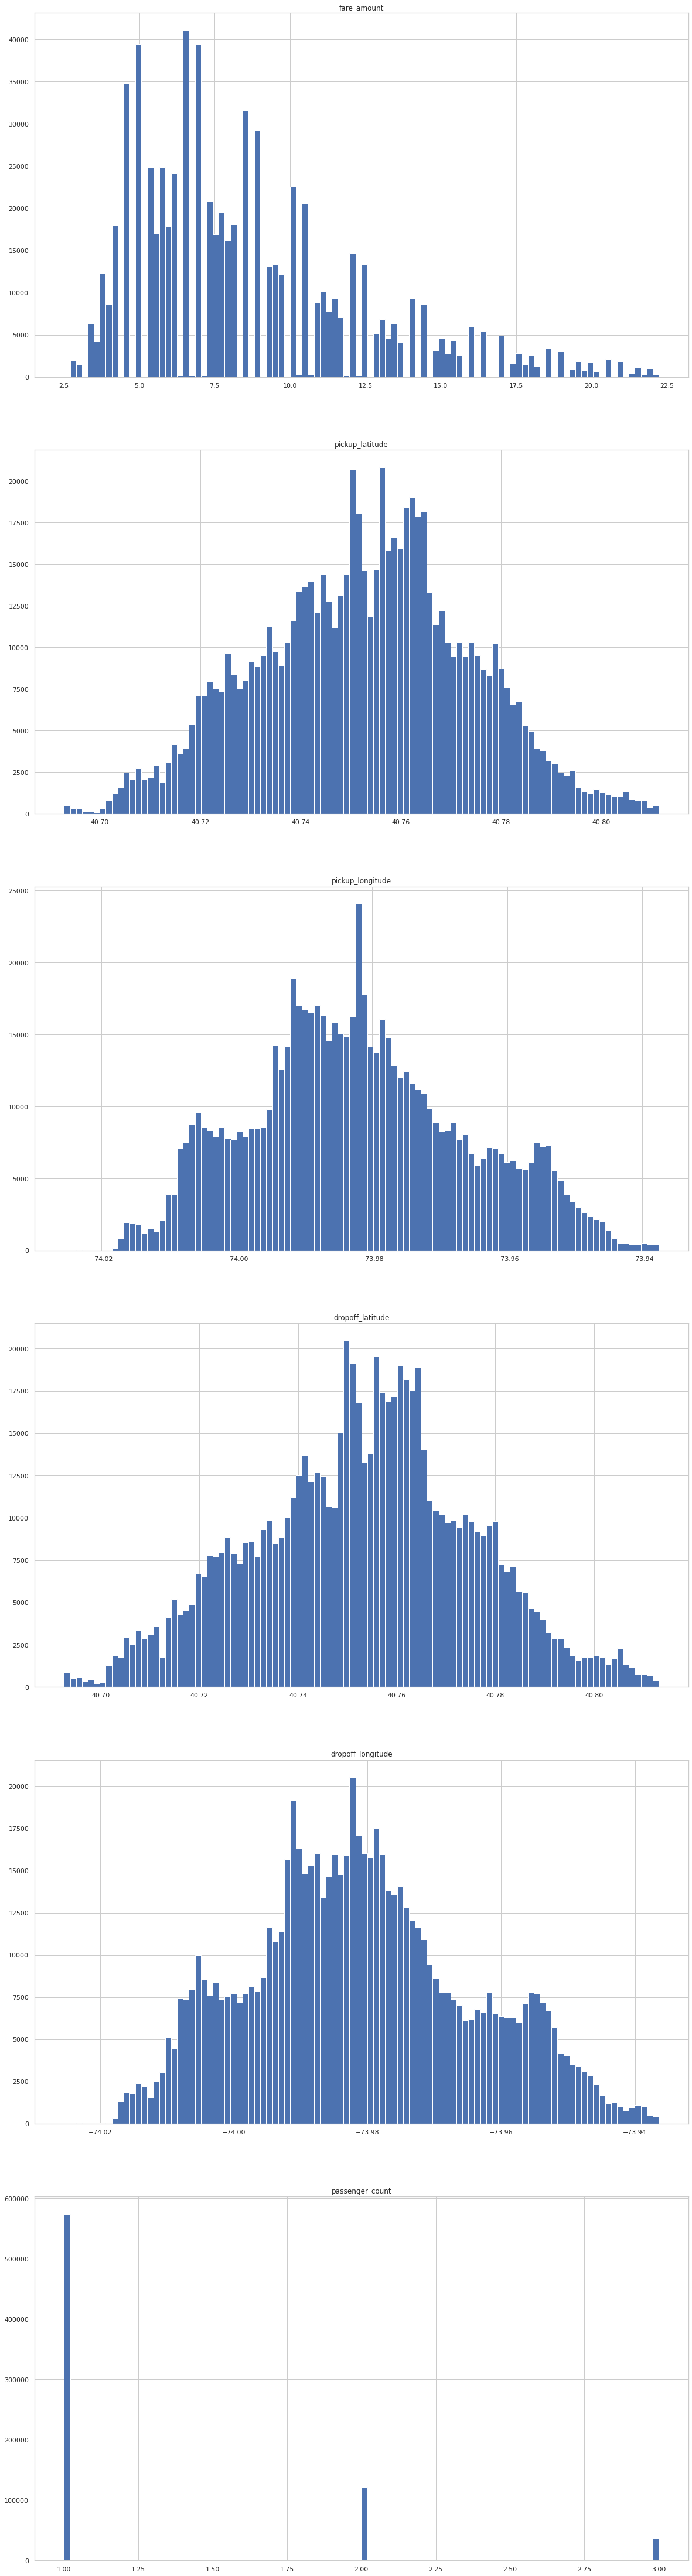

In [ ]:
fig,axi = plt.subplots(6,figsize=(20,80))
for i in range(len(iqr_columns)):
  axi[i].hist(train[iqr_columns[i]],bins =100)
  axi[i].set_title(iqr_columns[i])

In [ ]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [ ]:
#Convert for train data
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [ ]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [ ]:
#check the dtypes after conversion
print(train.shape)
train.dtypes

(732379, 8)


key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
print(test.shape)
test.dtypes

(9914, 7)


key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [ ]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [ ]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [ ]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,3.787239,2011,1,6,3,9


Data Visulization

In [ ]:
train.columns

Index(['fare_amount', 'H_Distance', 'Year', 'Month', 'Date', 'Hour'], dtype='object')

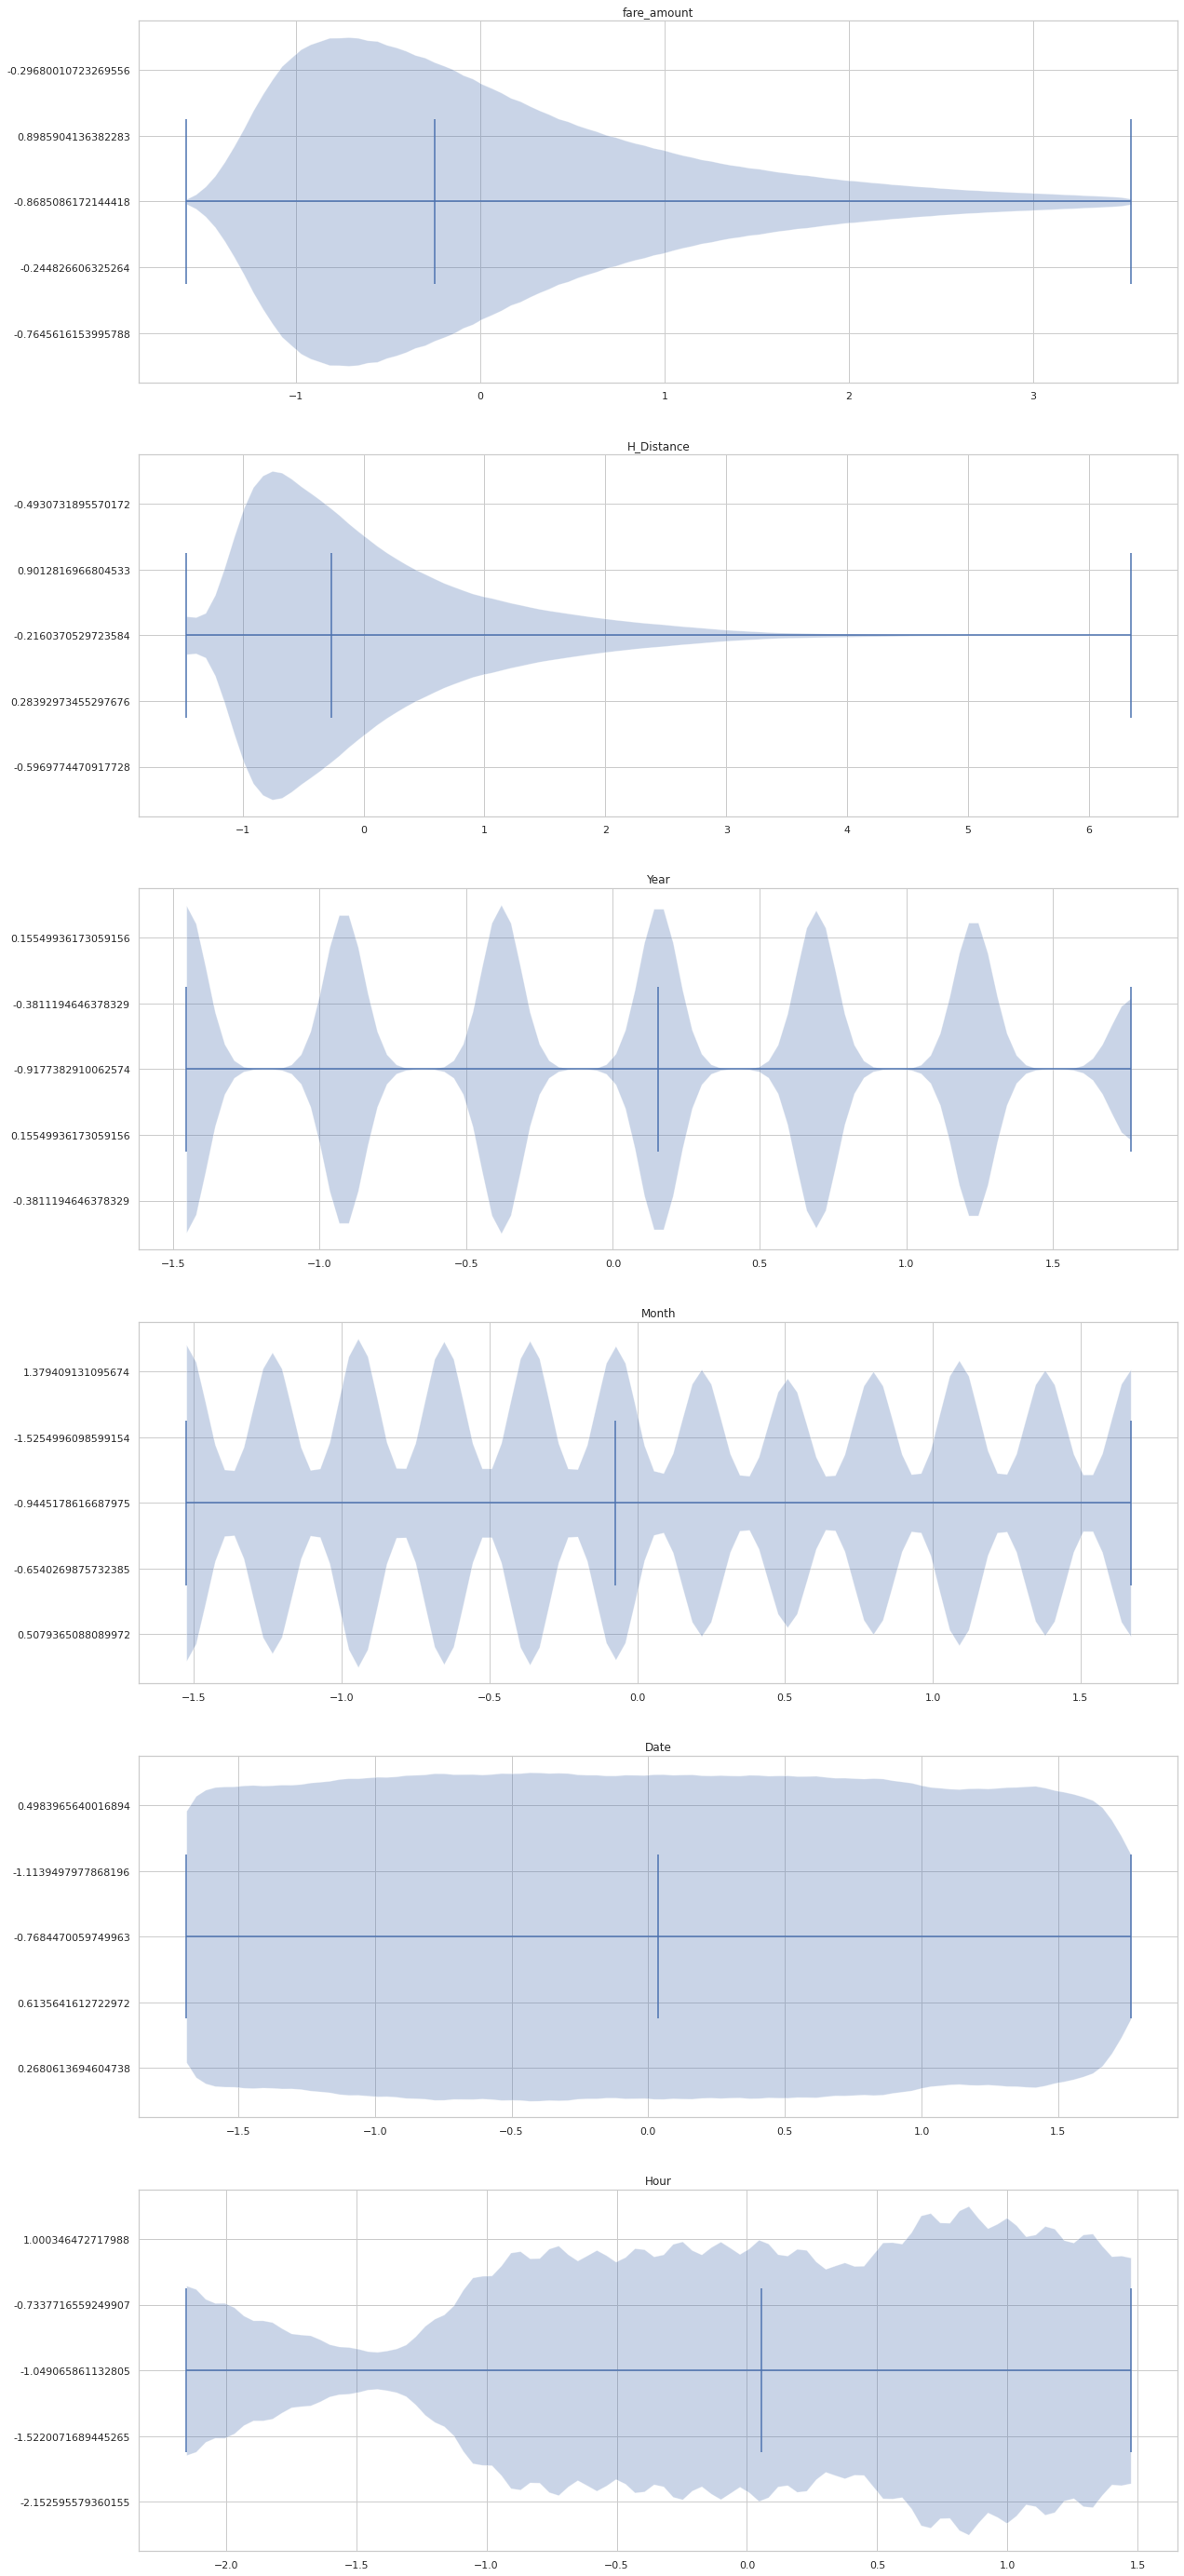

In [ ]:
# violin plot of all the columns
index = ['fare_amount','H_Distance', 'Year','Month','Date','Hour']
figure ,axi = plt.subplots(6,figsize=(20,50))
sns.set_theme(style ="whitegrid")
for i in range(len(index)):
  axi[i].violinplot(list(train[index[i]]),showmedians=True,vert=False)
  axi[i].set_yticklabels(list(train[index[i]]))
  axi[i].set_title(index[i])






**1. Does the number of passengers affect the fare?**

**2. Does the date and time of pickup affect the fare?**

**3. Does the day of the week affect the fare?**

**4. Does the distance affect the fare?**

# Continue in a similar way for each of the parts

*Data Scaling*

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# X = train[['fare_amount','pickup_datetime	','pickup_longitude','pickup_latitude' , 'dropoff_longitude	' , '	dropoff_latitude'  , 'passenger_count' ,  'H_Distance']]
train = train[['fare_amount', 'H_Distance', 'Year', 'Month', 'Date', 'Hour']]
scaledX = scale.fit_transform(train)
print(scaledX)

[[ 2.14595444  3.81498398 -0.91773829 -1.52549961 -1.2291174   0.36975806]
 [-0.76456162 -0.59697745 -0.38111946  0.50793651  0.26806137 -2.15259558]
 [-0.24482661  0.28392973  0.15549936 -0.65402699  0.61356416 -1.52200717]
 ...
 [-0.42673386 -0.29064272  1.22873701  0.79842738 -0.30777662  1.15799358]
 [-0.45272061 -0.31381267 -0.38111946  0.21744563 -0.8836146  -2.15259558]
 [-1.18034962 -0.99156637 -1.45435712  1.66990001  1.76524013  0.05446386]]


In [ ]:
for col in train:
  ss = StandardScaler()
  train[col] = ss.fit_transform(train[[col]])
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,fare_amount,H_Distance,Year,Month,Date,Hour
1,2.145954,3.814984,-0.917738,-1.525500,-1.229117,0.369758
2,-0.764562,-0.596977,-0.381119,0.507937,0.268061,-2.152596
3,-0.244827,0.283930,0.155499,-0.654027,0.613564,-1.522007
4,-0.868509,-0.216037,-0.917738,-0.944518,-0.768447,-1.049066
5,0.898590,0.901282,-0.381119,-1.525500,-1.113950,-0.733772


##Building Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
# Split into a training and testing set
X= train.drop('fare_amount', axis=1)
y=train['fare_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

# Define the pipeline for scaling and model fitting
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor())
])

# Scale the data and fit the model
pipeline.fit(X_train, Y_train)

# Evaluate the model
Y_pred = pipeline.predict(X_test)
lr.fit(X_train,Y_train)
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, Y_test))
print('Score', pipeline.score(X_test, Y_test))

print("For Reference lets print the ones which came for linear regression")
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("score",lr.score(X_test,Y_test))

Mean Absolute Error:  0.4028472994397086
Score 0.6767868184373471
For Reference lets print the ones which came for linear regression
Mean Absolute Error:  0.4028472994397086
score 0.6768596949919075


In [ ]:
X.describe()

,H_Distance,Year,Month,Date,Hour
count,7.323790e+05,7.323790e+05,7.323790e+05,7.323790e+05,7.323790e+05
mean,-3.425212e-16,3.232211e-14,-3.371391e-17,-9.673709e-17,4.942120e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.465250e+00,-1.454357e+00,-1.525500e+00,-1.689788e+00,-2.152596e+00
25%,-7.251204e-01,-9.177383e-01,-9.445179e-01,-8.836146e-01,-7.337717e-01
50%,-2.677177e-01,1.554994e-01,-7.304524e-02,3.772617e-02,5.446386e-02
75%,4.636886e-01,6.921182e-01,7.984274e-01,8.438994e-01,8.426994e-01
max,6.344029e+00,1.765356e+00,1.669900e+00,1.765240e+00,1.473288e+00


In [ ]:
# there are no categorical features
categorical_features = X.select_dtypes(exclude='number').columns.tolist()
categorical_features, X.head()

([],    H_Distance      Year     Month      Date      Hour
 1    3.814984 -0.917738 -1.525500 -1.229117  0.369758
 2   -0.596977 -0.381119  0.507937  0.268061 -2.152596
 3    0.283930  0.155499 -0.654027  0.613564 -1.522007
 4   -0.216037 -0.917738 -0.944518 -0.768447 -1.049066
 5    0.901282 -0.381119 -1.525500 -1.113950 -0.733772)

## K-fold Cross validation

In [ ]:
def cross_validation(k,data):
  l=len(data)//k
  i=0
  n=0
  df_list=[]
  while(i<k and (n+l)<=len(data)):
    df_list.append(data.iloc[n:n+l])
    n=l*(i+1)
    i+=1
  if(n<len(data)):
    df_list.append(data.iloc[n:])
  return df_list

In [ ]:
kross = cross_validation(11,train)
print(len(kross[10]),len(kross))

66579 12


In [ ]:
#pd.concat(ans[0:4],axis=0)
kross_1=kross[0:4]+kross[4:]
#print(ans1)
pd.concat(kross_1,axis=0)

,fare_amount,H_Distance,Year,Month,Date,Hour
1,2.145954,3.814984,-0.917738,-1.525500,-1.229117,0.369758
2,-0.764562,-0.596977,-0.381119,0.507937,0.268061,-2.152596
3,-0.244827,0.283930,0.155499,-0.654027,0.613564,-1.522007
4,-0.868509,-0.216037,-0.917738,-0.944518,-0.768447,-1.049066
5,0.898590,0.901282,-0.381119,-1.525500,-1.113950,-0.733772
...,...,...,...,...,...,...
999992,-0.764562,-0.481101,-0.381119,-1.525500,0.613564,-0.576125
999993,1.652206,0.873119,0.155499,1.669900,-0.192609,-0.418477
999995,-0.426734,-0.290643,1.228737,0.798427,-0.307777,1.157994
999998,-0.452721,-0.313813,-0.381119,0.217446,-0.883615,-2.152596


## LinearRegression

In [ ]:
e#By pseudo inverse method

mat1 = train[["H_Distance",'Year', 'Month']].to_numpy()
ones = np.ones((len(train),1))
mat1 = np.hstack((ones,mat1))
y= np.array(train['fare_amount'].tolist())
w = np.dot(np.linalg.pinv(mat1),y).tolist()

y_1= np.array(train['fare_amount'].tolist())
y_2 = np.dot(mat1,w)
mse = mean_squared_error(y_1,y_2)
mse

0.320918988903542

# Start of Part 2: Life Expectancy prediction

In [ ]:
trainee = pd.read_csv('/content/Life Expectancy Data.csv')
trainee.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
trainee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   float64
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   float64
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   float64
 12  Polio               

In [ ]:
trainee.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,0.778678,0.232663,0.020346,0.253676,0.036863,0.800179,0.016924,0.494535,0.021057,0.844087,0.413893,0.850053,0.039207,0.046706,1.132552e-02,0.178332,0.174034,0.674734,0.585502
std,4.087711,0.098841,0.173320,0.075529,0.225472,0.092780,0.258633,0.076733,0.256216,0.077570,0.226773,0.159791,0.217972,0.119217,0.096296,5.445754e-02,0.169089,0.165027,0.195608,0.135043
min,2000.000000,0.494382,0.001383,0.000000,0.000560,0.000000,0.020202,0.000000,0.025940,0.000000,0.030303,0.051425,0.020202,0.001976,0.000014,2.627797e-08,0.003676,0.003546,0.000000,0.202899
25%,2005.000000,0.723596,0.106501,0.000625,0.045327,0.001974,0.747475,0.000000,0.252918,0.000476,0.818182,0.306463,0.828283,0.001976,0.003878,1.483137e-04,0.058824,0.060284,0.543803,0.497585
50%,2008.000000,0.805618,0.204703,0.001875,0.212087,0.007653,0.898990,0.000114,0.566796,0.001905,0.939394,0.405837,0.929293,0.001976,0.013364,1.097207e-03,0.110294,0.113475,0.719017,0.594203
75%,2011.000000,0.842697,0.313970,0.013750,0.410744,0.026865,0.969697,0.002838,0.723735,0.013810,0.979798,0.519110,0.979798,0.013834,0.039594,5.919478e-03,0.261029,0.251773,0.802350,0.676329
max,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check no of rows & columns in the train dataset
print("Shape of the Training data :", trainee.shape)

# See all the columns in the train dataset
print("All columns are :", list(trainee.columns))

Shape of the Training data : (1649, 22)
All columns are : ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
trainee.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
trainee = trainee.dropna(how = 'any', axis = 0)
trainee.shape

(1649, 22)

In [ ]:
trainee

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,0.730337,0.363762,0.038750,0.000560,0.003759,0.656566,0.008780,...,0.060606,0.567060,0.656566,0.001976,0.004903,0.026074,0.632353,0.613475,0.511752,0.487923
1,Afghanistan,2014,Developing,0.673034,0.374827,0.040000,0.000560,0.003878,0.626263,0.003743,...,0.585859,0.568450,0.626263,0.001976,0.005141,0.000253,0.643382,0.620567,0.508547,0.483092
2,Afghanistan,2013,Developing,0.673034,0.370678,0.041250,0.000560,0.003861,0.646465,0.003271,...,0.626263,0.564976,0.646465,0.001976,0.005301,0.024525,0.650735,0.627660,0.502137,0.478261
3,Afghanistan,2012,Developing,0.668539,0.376210,0.043125,0.000560,0.004123,0.676768,0.021203,...,0.676768,0.592078,0.676768,0.001976,0.005622,0.002857,0.658088,0.638298,0.494658,0.473430
4,Afghanistan,2011,Developing,0.665169,0.380360,0.044375,0.000560,0.000374,0.686869,0.022923,...,0.686869,0.546908,0.686869,0.001976,0.000533,0.002302,0.669118,0.645390,0.485043,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,0.497753,1.000000,0.016875,0.243984,0.000000,0.686869,0.000236,...,0.676768,0.495483,0.656566,0.664032,0.003813,0.009876,0.345588,0.333333,0.434829,0.444444
2934,Zimbabwe,2003,Developing,0.500000,0.988935,0.016250,0.227196,0.000000,0.070707,0.007593,...,0.070707,0.453092,0.686869,0.725296,0.003804,0.009765,0.360294,0.351064,0.446581,0.458937
2935,Zimbabwe,2002,Developing,0.503371,0.100968,0.015625,0.247902,0.000000,0.737374,0.002313,...,0.737374,0.453787,0.717172,0.786561,0.000481,0.000097,0.044118,0.046099,0.456197,0.483092
2936,Zimbabwe,2001,Developing,0.508989,0.948824,0.015625,0.096251,0.000000,0.767677,0.004025,...,0.767677,0.428075,0.757576,0.832016,0.004603,0.009558,0.058824,0.060284,0.456197,0.473430


In [ ]:
trainee.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
corr = trainee.corr()
corr['Life expectancy ']

Year                               0.050771
Life expectancy                    1.000000
Adult Mortality                   -0.702523
infant deaths                     -0.169074
Alcohol                            0.402718
percentage expenditure             0.409631
Hepatitis B                        0.199935
Measles                           -0.068881
 BMI                               0.542042
under-five deaths                 -0.192265
Polio                              0.327294
Total expenditure                  0.174718
Diphtheria                         0.341331
 HIV/AIDS                         -0.592236
GDP                                0.441322
Population                        -0.022305
 thinness  1-19 years             -0.457838
 thinness 5-9 years               -0.457508
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy , dtype: float64

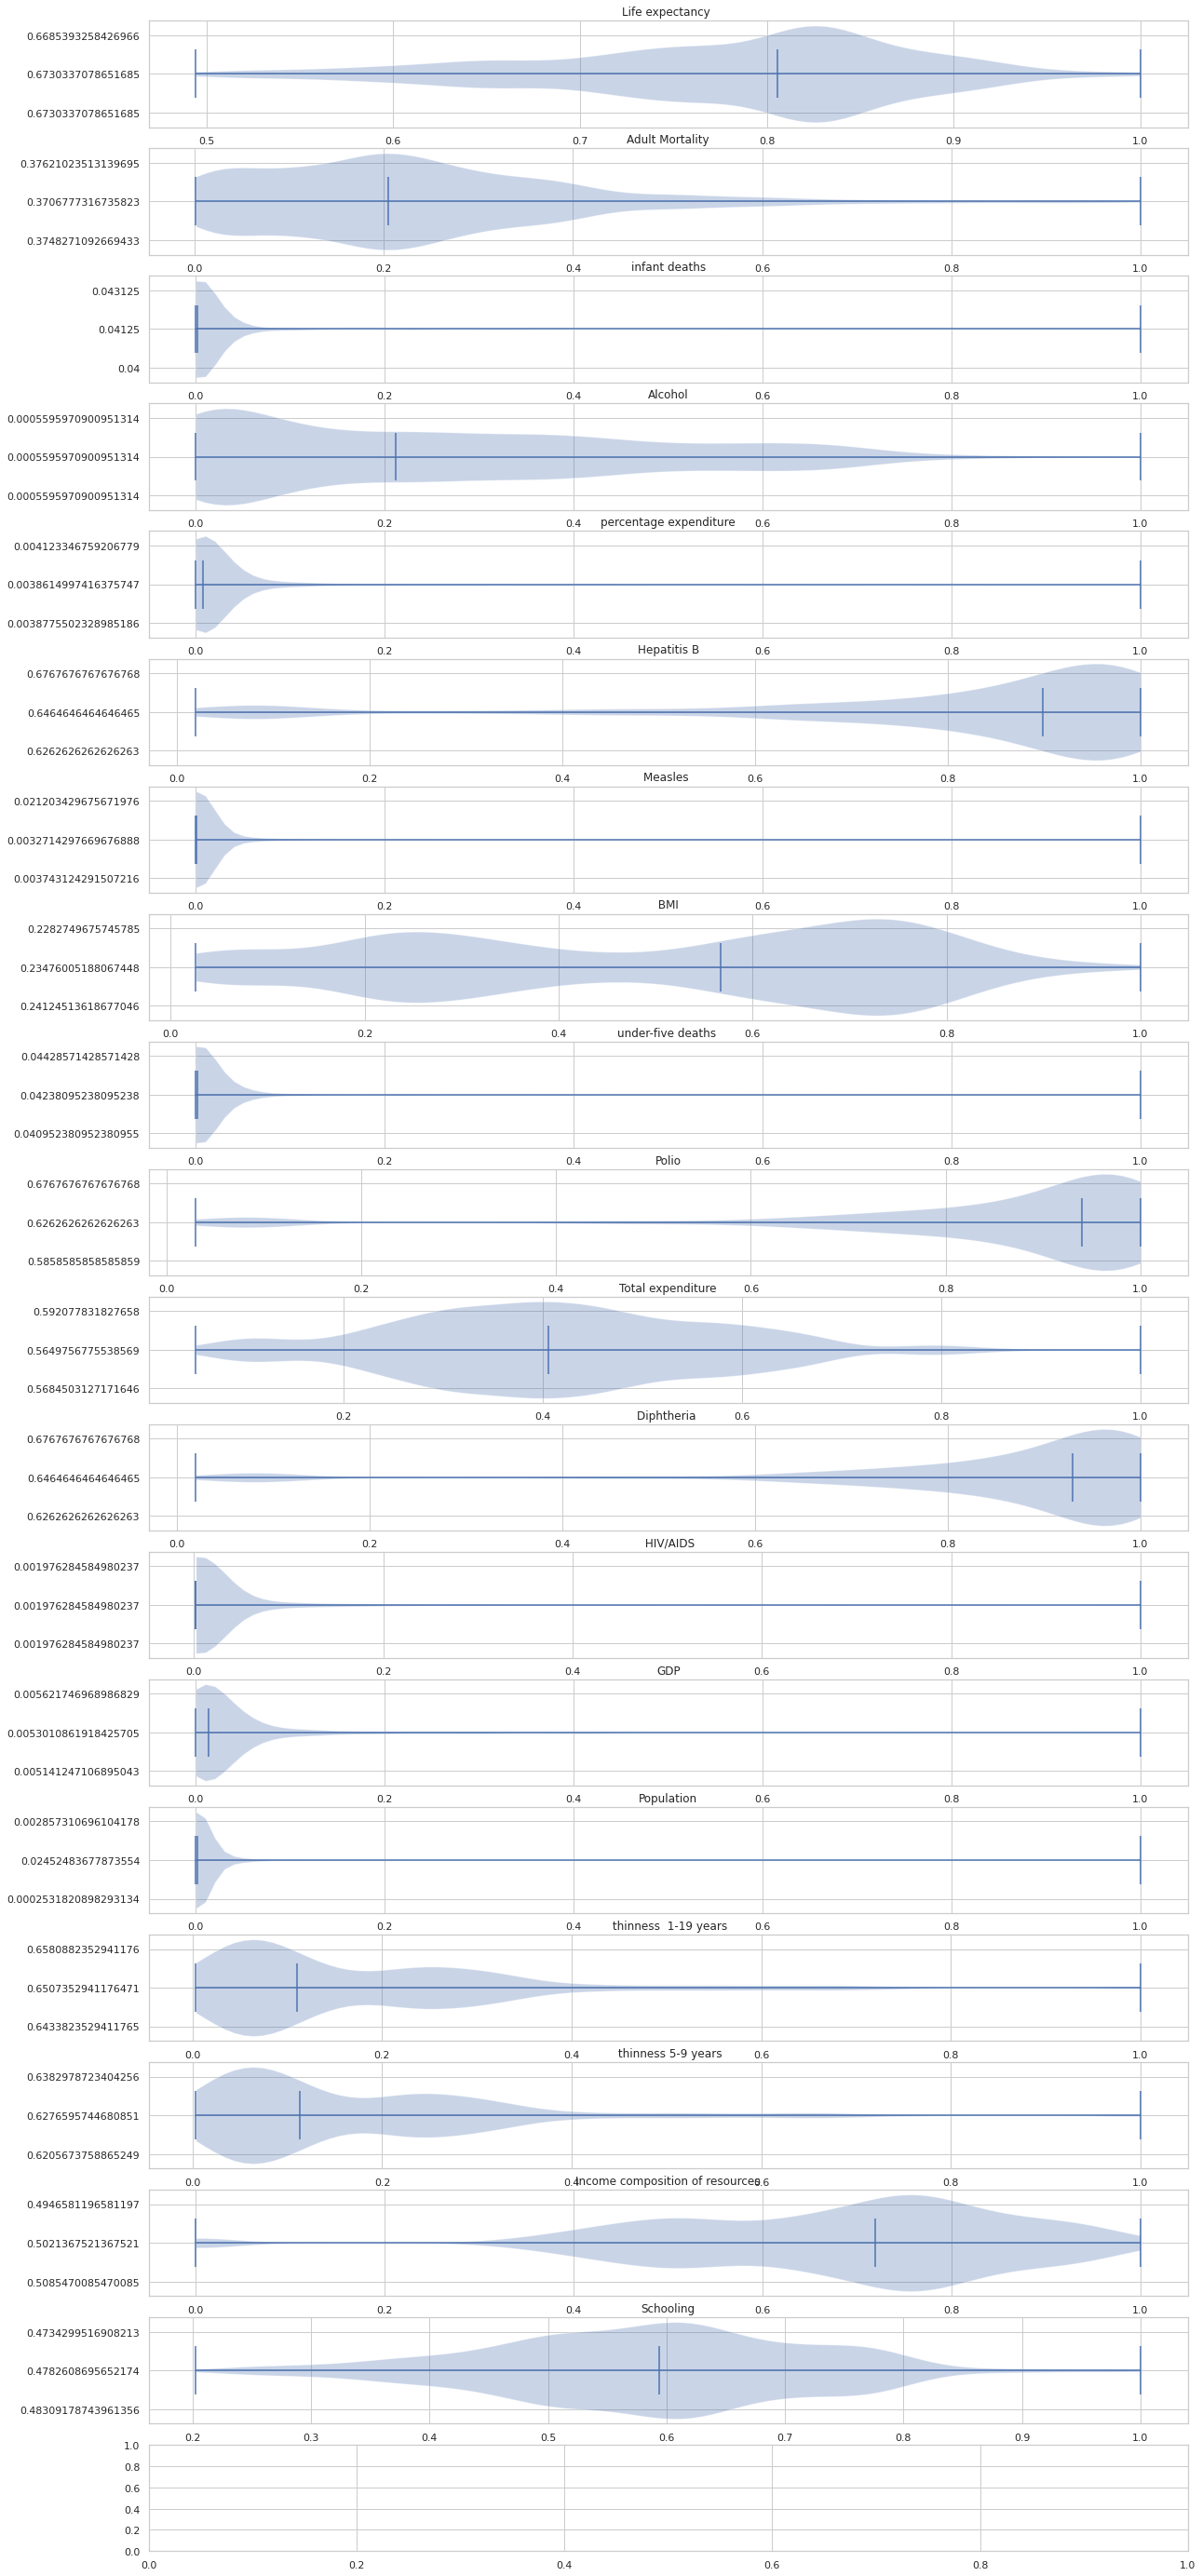

In [ ]:
# violin plot of all the columns
dummy = trainee.drop(['Country','Status','Year'],axis=1)
l = dummy.columns.tolist()
figure,axi =plt.subplots(20,figsize=(20,50))
for i in range(len(l)):
  axi[i].violinplot(list(dummy[l[i]]),showmedians=True,vert=False)
  axi[i].set_yticklabels(list(dummy[l[i]]))

  axi[i].set_title(l[i])


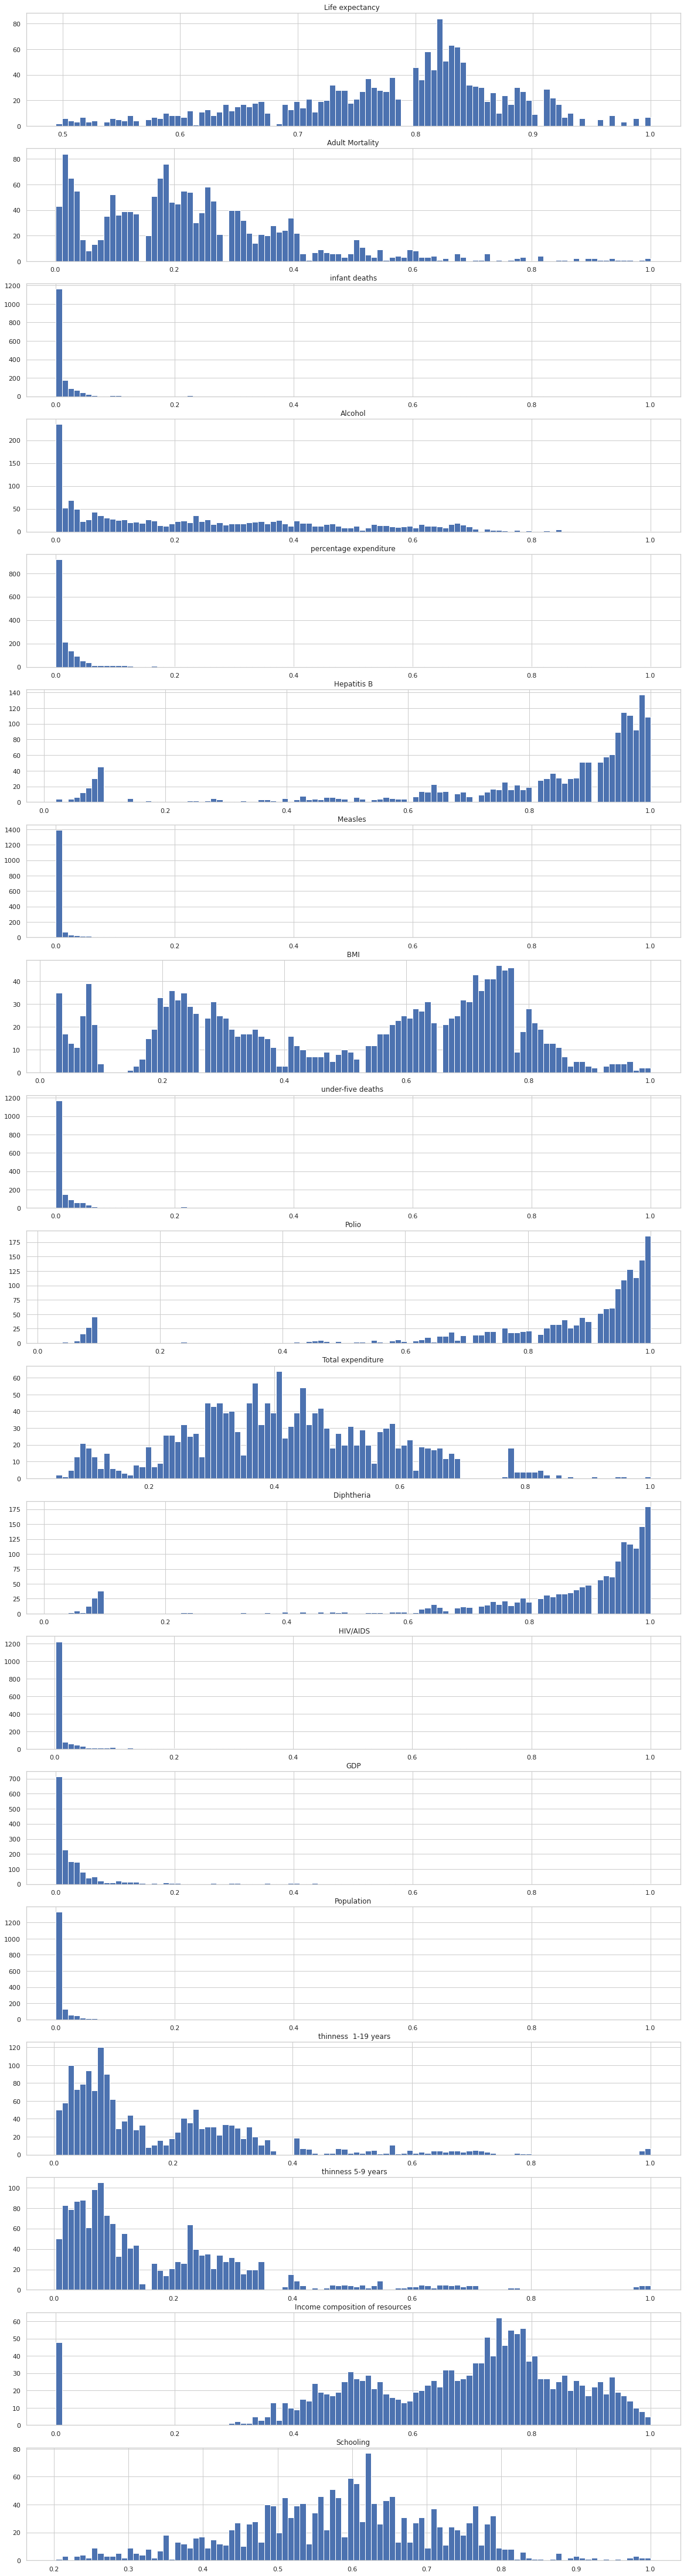

In [ ]:
# Distribution of each column of the df
figure,axi = plt.subplots(19,figsize=(20,80))
for i in range(len(l)):
  axi[i].hist(dummy[l[i]], bins =100)
  axi[i].set_title(l[i])

In [ ]:
# data cleaning
trainee = trainee.dropna()

In [ ]:
# data scaling
for i in l:
  maxi = max(trainee[i].tolist())
  trainee[i]=trainee[i]/maxi

In [ ]:
trainee.head(),trainee.shape

(       Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing          0.730337         0.363762   
 1  Afghanistan  2014  Developing          0.673034         0.374827   
 2  Afghanistan  2013  Developing          0.673034         0.370678   
 3  Afghanistan  2012  Developing          0.668539         0.376210   
 4  Afghanistan  2011  Developing          0.665169         0.380360   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0       0.038750  0.00056                0.003759     0.656566  0.008780  ...   
 1       0.040000  0.00056                0.003878     0.626263  0.003743  ...   
 2       0.041250  0.00056                0.003861     0.646465  0.003271  ...   
 3       0.043125  0.00056                0.004123     0.676768  0.021203  ...   
 4       0.044375  0.00056                0.000374     0.686869  0.022923  ...   
 
       Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  Popul

Data cleaning and data scaling are done seperately so there is no need to make a seperate function for pipeline 

In [ ]:
# K fold validation
def cross_valid(k,train):
  l=len(train)//k
  i=0
  n=0
  df=[]
  while(i<k and (n+l)<=len(train)):
    df.append(train.iloc[n:n+l])
    n=l*(i+1)
    i+=1
  if(n<len(train)):
    df.append(data.iloc[n:])
  return df,k

In [ ]:
#Executing the k cross validation 
dl,k=cross_validation(15,trainee)
i=0 
while i<k:
  if i==len(dl)-1:
    val_1=dl[i]
    trainee_1=dl[0:i]
    trainee_1=pd.concat(trainee_1,axis=0)
  else:
    val_1=dl[i]
    trainee_1=dl[0:i]+dl[(i+1):]
    trainee_1=pd.concat(trainee_1,axis=0)
  x_trainee=trainee_1.drop(['Country','Status','Life expectancy '],axis=1)
  y_trainee=trainee_1['Life expectancy ']
  x_test =val_1.drop(['Country','Status','Life expectancy '],axis=1)
  y_test =val_1['Life expectancy ']
  final = linear_model.LinearRegression()
  final.fit(x_trainee, y_trainee)

  print('Validation set no.: {i+1}')
  print('Score:', final.score(x_test , y_test ))
  print('Loss:', mean_squared_error(final.predict(x_test ), y_test ))
  i+=1

Validation set no.: {i+1}
Score: 0.8428195994825465
Loss: 0.0018488804760001352
Validation set no.: {i+1}
Score: 0.5270783517419247
Loss: 0.002696026238700618
Validation set no.: {i+1}
Score: 0.8898625920258901
Loss: 0.0013901299280007409
Validation set no.: {i+1}
Score: 0.8701809480317821
Loss: 0.0014235973359536455
Validation set no.: {i+1}
Score: 0.618545704965934
Loss: 0.0020353294478771744
Validation set no.: {i+1}
Score: 0.8216039475176853
Loss: 0.001771332881472943
Validation set no.: {i+1}
Score: 0.7361804931436995
Loss: 0.001277030053349868
Validation set no.: {i+1}
Score: 0.7366361051775276
Loss: 0.0025404798769275245
Validation set no.: {i+1}
Score: 0.8710461889936861
Loss: 0.0019047245053056797
Validation set no.: {i+1}
Score: 0.7973950658485844
Loss: 0.001362875984791649
Validation set no.: {i+1}
Score: 0.555264011843108
Loss: 0.003043870072907508
Validation set no.: {i+1}
Score: 0.7222590016893098
Loss: 0.0015345623385652099
Validation set no.: {i+1}
Score: 0.806216201411